Total de opiniones: 162975
 Total de muestra: 300


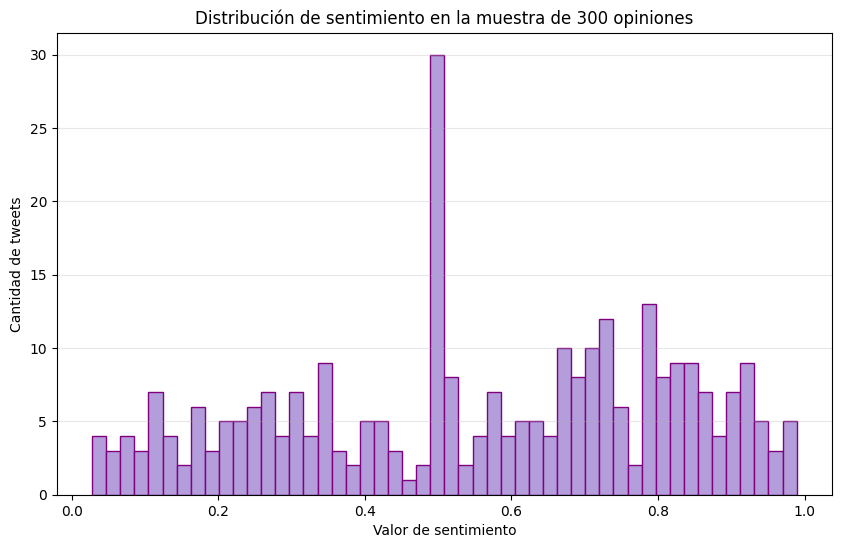

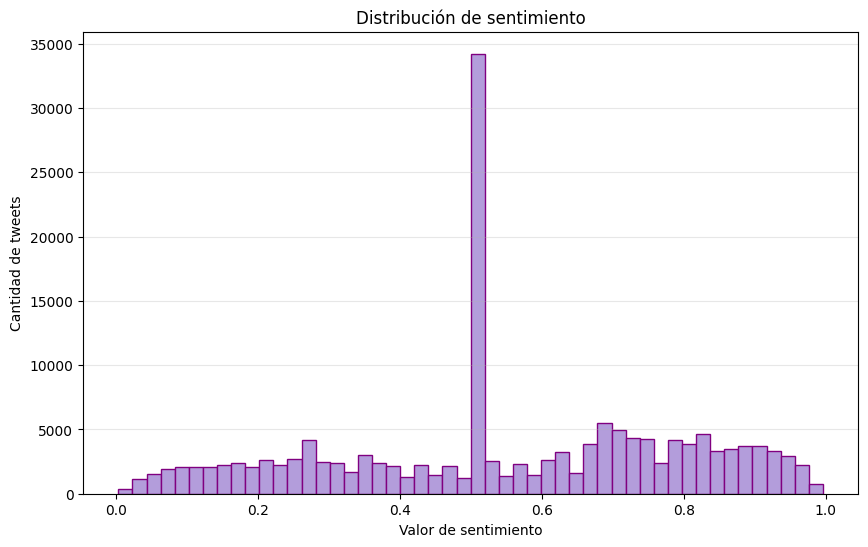

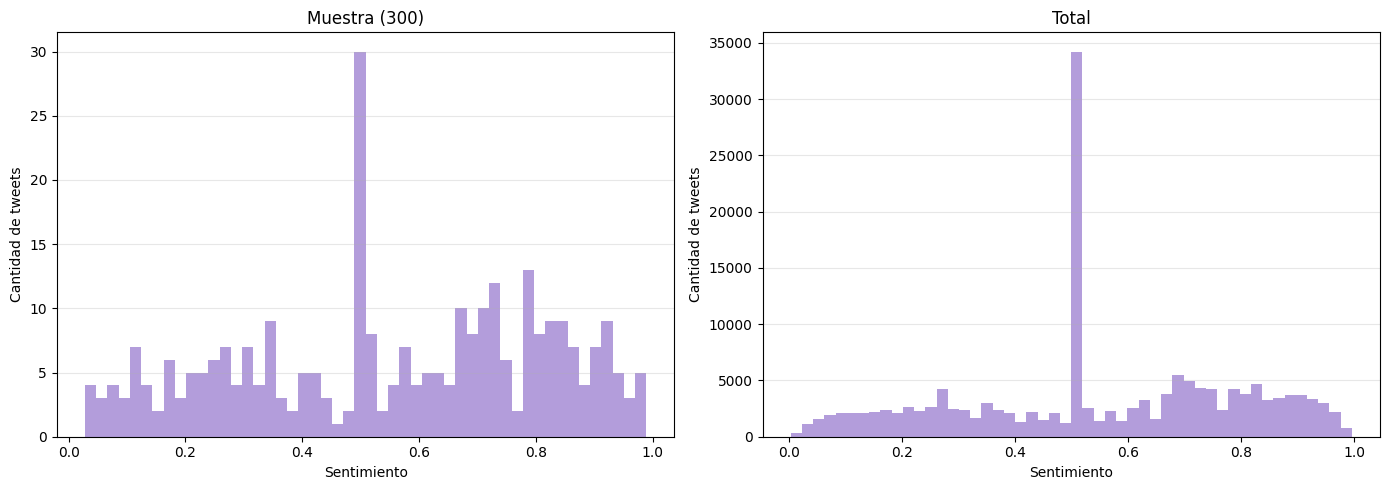

In [ ]:

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pathlib import Path
import matplotlib.pyplot as plt

# # Rutas
# data_path = Path("data")
# input_file = data_path / "Twitter_data.csv"
# output_scores = data_path / "Twitter_data_scores.csv"
# output_sample = data_path / "Twitter_data_sample300.csv"

# Cargar los datos
df = pd.read_csv("data/Twitter_data.csv")

# Inicializar el analizador de sentimiento
analyzer = SentimentIntensityAnalyzer()

# Limpiar y analizar sentimiento
def calcular_sentimiento(texto):
    if pd.isna(texto) or texto.strip() == "":
        return None
    puntuacion = analyzer.polarity_scores(texto)
    return puntuacion["compound"]

df["sentimiento"] = df["clean_text"].apply(calcular_sentimiento)

# Quitar filas nulas
df = df.dropna(subset=["sentimiento"])

# Convertir de escala [-1,1] a [0 ,1]
df["sentimiento_escalado"] = (df["sentimiento"] + 1) / 2

# Guardar todos los scores
df[["sentimiento_escalado"]].to_csv("data/Twitter_data_scores.csv", index=False)

# Crear muestra estratificada de 300 tweets (diviendo en deciles)
n_muestra= 300
df["decil"] = pd.qcut(df["sentimiento"], q=10, labels=False, duplicates="drop")

# Sacar 30 tweets de cada grupo 
opiniones_objetivo_por_decil = int(n_muestra/ 10)

muestra = (
    df
    .groupby("decil", group_keys=False)
    .apply(lambda x: x.sample(n=min(opiniones_objetivo_por_decil, len(x)), random_state=9),
    include_groups=False)
)
# Si no llegamos a 300, rellenamos con tweets aleatorios
if len(muestra) < n_muestra :
    faltan = 300 - len(muestra)
    resto = df[~df.index.isin(muestra.index)]
    extra = resto.sample(n=min(faltan, len(resto)), random_state=9)
    muestra = pd.concat([muestra, extra], ignore_index=True)

# Guardar muestra 
muestra[["clean_text", "sentimiento", "sentimiento_escalado"]].to_csv(
    "data/Twitter_data_sample300.csv", 
    index=False
)

# Mostrar resultados
print(f"Total de opiniones: {len(df)}")
print(f" Total de muestra: {len(muestra)}")

# Comprobación de muestra estratificada
plt.figure(figsize=(10, 6))
plt.hist(muestra["sentimiento_escalado"], bins=50, color='#B39DDB' , edgecolor='purple')
plt.xlabel('Valor de sentimiento')
plt.ylabel('Cantidad de tweets')
plt.title('Distribución de sentimiento en la muestra de 300 opiniones')
plt.grid(axis='y', alpha=0.3)

plt.figure(figsize=(10, 6))
plt.hist(df["sentimiento_escalado"], bins=50, color='#B39DDB',  edgecolor='purple')
plt.xlabel('Valor de sentimiento')
plt.ylabel('Cantidad de tweets')
plt.title('Distribución de sentimiento')
plt.grid(axis='y', alpha=0.3)


##
plt.figure(figsize=(14, 5))

# Muestra
plt.subplot(1, 2, 1)
plt.hist(muestra["sentimiento_escalado"], bins=50, color='#B39DDB')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de tweets')
plt.title('Muestra (300)')
plt.grid(axis='y', alpha=0.3)

# Total
plt.subplot(1, 2, 2)
plt.hist(df["sentimiento_escalado"], bins=50, color='#B39DDB')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de tweets')
plt.title('Total')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [4]:
df["decil"].value_counts().sort_index()

decil
(0.0018, 0.188]    16616
(0.188, 0.309]     16750
(0.309, 0.461]     16192
(0.461, 0.5]       35445
(0.5, 0.625]       12958
(0.625, 0.711]     17635
(0.711, 0.793]     15205
(0.793, 0.879]     16144
(0.879, 0.996]     16030
Name: count, dtype: int64